Data visualisation on the ChEMBL bioactive molecules database using plotnine/ggplot

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, geom_bar, geom_text, geom_histogram, aes, facet_wrap, geom_jitter, geom_violin, coord_flip

In [2]:
df = pd.read_csv("target_ligand_joined.csv")
df

,target,chembl_id,pchembl_value,MolWt,MolLogP,NumRotatableBonds,MolMR,TPSA,MaxAbsPartialCharge,MaxPartialCharge,MinPartialCharge,MinAbsPartialCharge,qed
0,akt1,CHEMBL307152,5.26,494.595,4.67530,5,146.1709,99.15,0.393129,0.259163,-0.393129,0.259163,0.210694
1,akt1,CHEMBL3216643,8.30,507.518,2.87330,7,131.2897,126.85,0.507067,0.337972,-0.507067,0.337972,0.329235
2,akt1,CHEMBL1204095,6.80,489.547,3.97730,7,134.6102,100.55,0.507067,0.251171,-0.507067,0.251171,0.434374
3,akt1,CHEMBL1202525,6.45,493.535,3.23310,8,130.6632,109.78,0.507067,0.251242,-0.507067,0.251242,0.413490
4,akt1,CHEMBL1202518,8.40,506.534,2.44630,7,133.3404,129.65,0.507067,0.251224,-0.507067,0.251224,0.362374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,thrb,CHEMBL4208256,4.84,242.209,2.38910,1,63.4680,55.99,0.402900,0.348252,-0.402900,0.348252,0.657031
21732,thrb,CHEMBL4226897,4.97,615.481,5.71780,9,162.7334,136.81,0.452634,0.410834,-0.452634,0.410834,0.201146
21733,thrb,CHEMBL502016,7.70,508.645,0.91257,9,132.5948,177.71,0.479712,0.325925,-0.479712,0.325925,0.161855
21734,thrb,CHEMBL182997,8.68,381.904,1.81290,5,101.3869,95.66,0.382709,0.252138,-0.382709,0.252138,0.724374


In [3]:
df['target'].value_counts()

thrb     5622
hivpr    3602
cp3a4    3570
akt1     2603
try1     1856
hivrt    1706
gcr      1058
kif11     796
cxcr4     645
ampc      278
Name: target, dtype: int64

In [4]:
df['chembl_id'].value_counts()

CHEMBL50         3
CHEMBL3786896    3
CHEMBL320233     2
CHEMBL94139      2
CHEMBL47486      2
                ..
CHEMBL323259     1
CHEMBL3899716    1
CHEMBL3699743    1
CHEMBL304491     1
CHEMBL1173697    1
Name: chembl_id, Length: 20572, dtype: int64

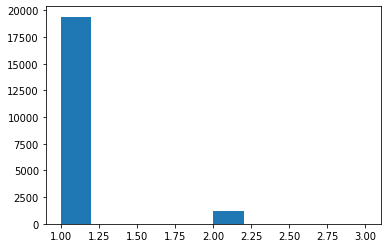

In [5]:
# exercise 2: number of distinct targets for every single ligand
df_ligands = df.groupby("chembl_id")
num_unique_targets = [len(df_ligands.get_group(ligand)["target"].unique()) for ligand in df_ligands.groups.keys()]
_=plt.hist(num_unique_targets)

In [6]:
# exercise 6: find most frequent collocations of targets
unique_targets = [tuple(df_ligands.get_group(ligand)["target"].unique()) for ligand in df_ligands.groups.keys()] # need to use hashable type (tuple) for Counter to work
unique_targets = [i for i in unique_targets if len(i) > 1] # only retain pairs or more

from collections import Counter
occurence_count = Counter(unique_targets)
most_frequent = occurence_count.most_common(10)

In [7]:
most_frequent

[(('try1', 'thrb'), 1033),
 (('cp3a4', 'cxcr4'), 48),
 (('akt1', 'cp3a4'), 43),
 (('cp3a4', 'gcr'), 13),
 (('hivpr', 'hivrt'), 12),
 (('cp3a4', 'hivpr'), 8),
 (('cp3a4', 'thrb'), 2),
 (('cp3a4', 'hivrt'), 1),
 (('cp3a4', 'try1', 'thrb'), 1),
 (('akt1', 'cp3a4', 'try1'), 1)]

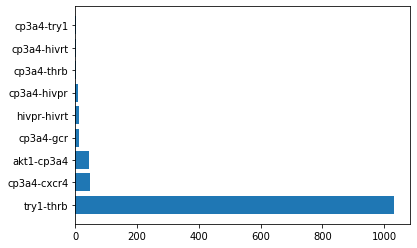

In [8]:
labels, height = zip(*most_frequent)
labels = [label[0]+'-'+label[1] for label in labels] # choose to ignore triples (occur only once each)

_=plt.barh(labels, height)

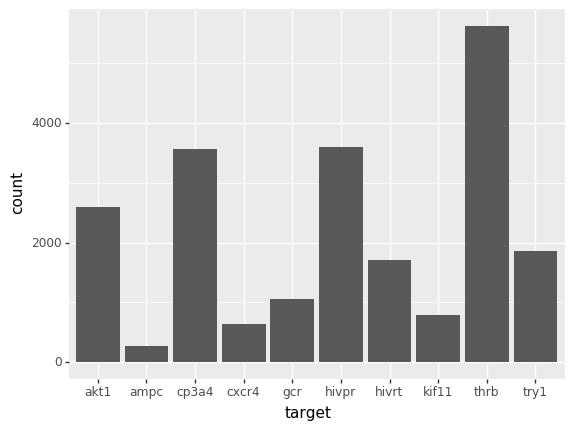

<ggplot: (-9223371868449721168)>

In [42]:
# Task 1: group by target (geom_bar does this automatically)
ggplot(df) + geom_bar(aes(x='target'))

In [36]:
grouped_target

,target,count
0,akt1,2603
1,ampc,278
2,cp3a4,3570
3,cxcr4,645
4,gcr,1058
5,hivpr,3602
6,hivrt,1706
7,kif11,796
8,thrb,5622
9,try1,1856


C:\Users\Florian\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 55'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


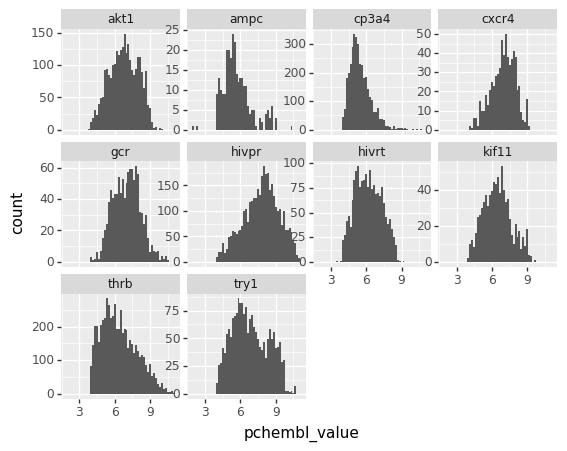

<ggplot: (-9223371868449801400)>

In [47]:
# Task 3: plot distr. of pChEMBL grouped by target
ggplot(df) + geom_histogram(aes(x='pchembl_value')) + facet_wrap(('target'), scales="free_y")

C:\Users\Florian\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


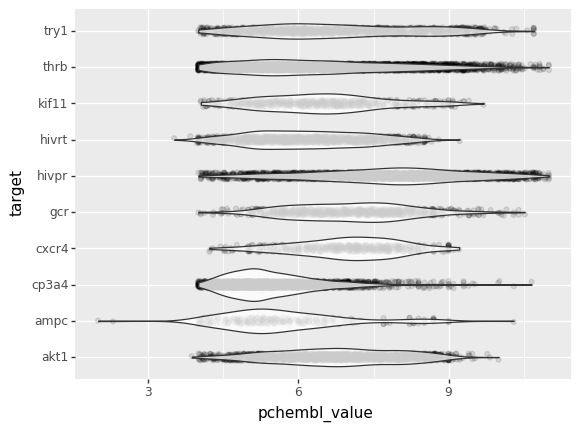

<ggplot: (-9223371868492362700)>

In [52]:
ggplot(df, aes(x='target', y='pchembl_value')) + geom_jitter(alpha=0.1, width=0.1) + geom_violin(alpha=0.8) + coord_flip()